In [1]:
import pandas
import matplotlib.pyplot as pyplot
import rollingAnalysis
from datetime import datetime
import custom_pyplot

sales = pandas.read_csv("sales.csv").drop('Unnamed: 0', axis = 1)
daily_sales = pandas.read_csv("daily_sales.csv")
orders = pandas.read_csv("orders.csv")
pizza_properties = pandas.read_csv("pizza_properties.csv")
ingredient_properties = pandas.read_csv("ingredient_properties.csv")

daily_sales.index = daily_sales["Unnamed: 0"].tolist()
daily_sales = daily_sales.drop('Unnamed: 0', axis = 1)
orders.index = orders["Unnamed: 0"].tolist()
orders = orders.drop('Unnamed: 0', axis = 1)
pizza_properties.index = pizza_properties["Unnamed: 0"].tolist()
pizza_properties = pizza_properties.drop('Unnamed: 0', axis = 1)
ingredient_properties.index = ingredient_properties["Unnamed: 0"].tolist()
ingredient_properties = ingredient_properties.drop('Unnamed: 0', axis = 1)

#convert ingredients to lists
sales["pizza_ingredients"] = sales["pizza_ingredients"].apply(lambda ingredients: ingredients.split(", "))
pizza_properties["ingredients"] = pizza_properties["ingredients"].apply(lambda ingredients: ingredients.split(", "))
ingredient_properties["pizza_types_containing"] = ingredient_properties["pizza_types_containing"].apply(lambda ingredients: ingredients.split(", "))

In [2]:
"$" + str(sales["total_price"].sum())
# revenue

'$817860.05'

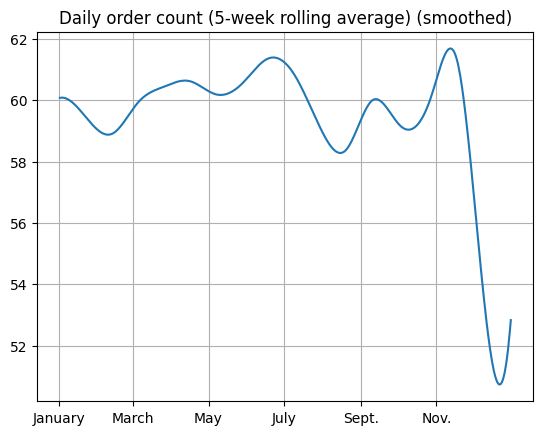

In [3]:
rollingAnalysis.plotRollingData(
    ["order_count"], daily_sales,
    17, spline = 20, legend = False
)
pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.title("Daily order count (5-week rolling average) (smoothed)")
pyplot.grid()

<Axes: title={'center': 'Distribution of orders per day'}>

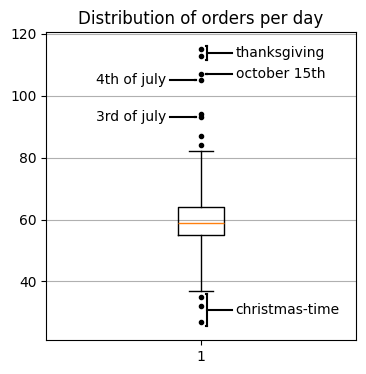

In [59]:
pyplot.figure(figsize = (4, 4))
pyplot.boxplot(x = daily_sales["order_count"], whis = 2, flierprops = dict(markerfacecolor = "black", marker = "."))
pyplot.grid(axis = "y")
pyplot.title("Distribution of orders per day")
axes = pyplot.subplot()
custom_pyplot.addHorizontalForkedLabel(axes, "thanksgiving", 0.1, 1, 0.02, 111.5, 116, direction = "right", text_nudge = (0.011, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "october 15th", 0.1, 1, 0.02, 107, 107, direction = "right", text_nudge = (0.011, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "3rd of july", 0.1, 1, 0.02, 93, 93, direction = "left", text_nudge = (-0.24, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "4th of july", 0.1, 1, 0.02, 105, 105, direction = "left", text_nudge = (-0.24, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "christmas-time", 0.1, 1, 0.02, 25.5, 36, direction = "right", text_nudge = (0.01, -1.25))